### 1. Upload data

In [37]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d spscientist/students-performance-in-exams

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 18.7MB/s]


In [4]:
!unzip students-performance-in-exams.zip

Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import math

In [41]:
df = pd.read_csv('student.csv')

In [42]:
df

,id,first_name,last_name,gender,part_time_job,absence_days,extracurricular_activities,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,male,False,3,False,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,female,False,2,False,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,female,False,9,True,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,female,False,5,False,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,male,False,5,False,Unknown,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,male,False,2,False,Construction Engineer,83,77,84,73,75,84,82
1996,1997,Thomas,Gilbert,male,False,2,False,Software Engineer,89,65,73,80,87,67,73
1997,1998,Madison,Cross,female,False,5,False,Software Engineer,97,85,63,93,68,94,78
1998,1999,Brittany,Compton,female,True,10,True,Business Owner,51,96,72,89,95,88,75


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   gender                      2000 non-null   object
 4   part_time_job               2000 non-null   bool  
 5   absence_days                2000 non-null   int64 
 6   extracurricular_activities  2000 non-null   bool  
 7   career_aspiration           2000 non-null   object
 8   math_score                  2000 non-null   int64 
 9   history_score               2000 non-null   int64 
 10  physics_score               2000 non-null   int64 
 11  chemistry_score             2000 non-null   int64 
 12  biology_score               2000 non-null   int64 
 13  english_score               2000 non-null   int6

In [44]:
df.describe()

,id,absence_days,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [45]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,id,first_name,last_name,gender,part_time_job,absence_days,extracurricular_activities,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,male,False,3,False,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,female,False,2,False,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,female,False,9,True,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,female,False,5,False,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,male,False,5,False,Unknown,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,male,False,2,False,Construction Engineer,83,77,84,73,75,84,82
1996,1997,Thomas,Gilbert,male,False,2,False,Software Engineer,89,65,73,80,87,67,73
1997,1998,Madison,Cross,female,False,5,False,Software Engineer,97,85,63,93,68,94,78
1998,1999,Brittany,Compton,female,True,10,True,Business Owner,51,96,72,89,95,88,75


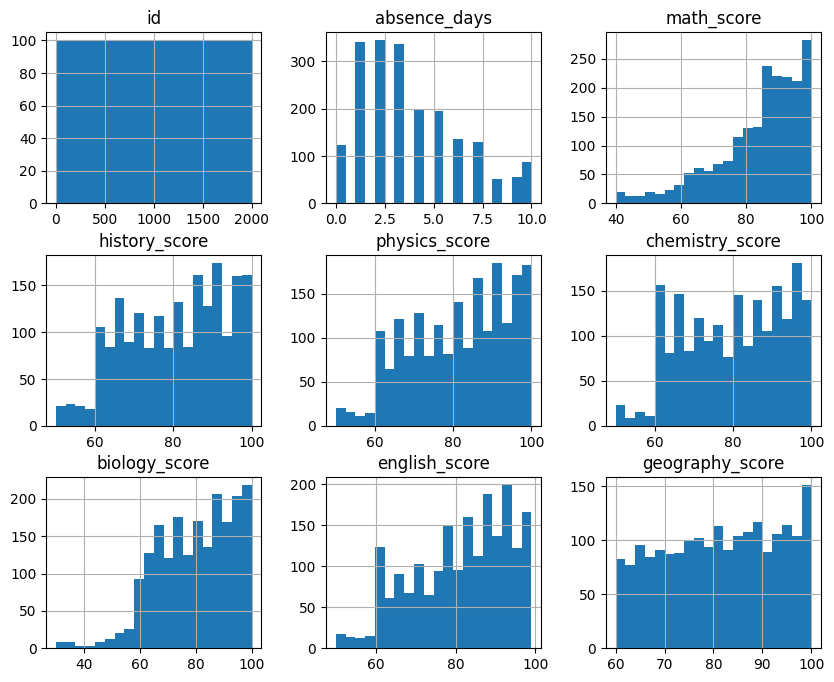

In [6]:
df.hist(figsize=(10, 8), bins=20)
plt.show()

In [17]:
# Đặt seed để cố định kết quả ngẫu nhiên
np.random.seed(50)

# Tạo ngẫu nhiên class A, A1, B, C cho từng học sinh
new_col = []
for i in range(len(df)):
    # A: Toán - Lý - Hóa
    # A1: Toán - Lý - Anh
    # B: Toán - Hóa - Sinh
    # C: Sử - Địa - Anh
    new_col.append(np.random.choice(['A','A1','B', 'C']))

df['class'] = new_col
df


,id,first_name,last_name,gender,part_time_job,absence_days,extracurricular_activities,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,class
0,1,Paul,Casey,male,False,3,False,Lawyer,73,81,93,97,63,80,87,A
1,2,Danielle,Sandoval,female,False,2,False,Doctor,90,86,96,100,90,88,90,A
2,3,Tina,Andrews,female,False,9,True,Government Officer,81,97,95,96,65,77,94,C
3,4,Tara,Clark,female,False,5,False,Artist,71,74,88,80,89,63,86,A1
4,5,Anthony,Campos,male,False,5,False,Unknown,84,77,65,65,80,74,76,A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,male,False,2,False,Construction Engineer,83,77,84,73,75,84,82,A1
1996,1997,Thomas,Gilbert,male,False,2,False,Software Engineer,89,65,73,80,87,67,73,C
1997,1998,Madison,Cross,female,False,5,False,Software Engineer,97,85,63,93,68,94,78,A1
1998,1999,Brittany,Compton,female,True,10,True,Business Owner,51,96,72,89,95,88,75,B


In [18]:
df['class'].value_counts()

class
C     524
A1    498
B     495
A     483
Name: count, dtype: int64

In [31]:
score_cols = df.filter(like='score').columns
score_cols

def calculate_weighted_average(row):
    # Xác định hệ số cho từng lớp
    if row['class'] == 'A':
        weights = {'math_score': 2, 'physics_score': 2, 'chemistry_score': 2}
    elif row['class'] == 'A1':
        weights = {'math_score': 2, 'physics_score': 2, 'english_score': 2}
    elif row['class'] == 'B':
        weights = {'math_score': 2, 'biology_score': 2, 'chemistry_score': 2}
    elif row['class'] == 'C':
        weights = {'history_score': 2, 'geography_score': 2, 'english_score': 2}
    else:
        weights = {}

    weighted_sum = 0
    total_weight = 0

    for col in score_cols:
        weight = weights.get(col, 1)
        weighted_sum += row[col] * weight
        total_weight += weight
    
    # tính điểm trung bình có hệ số
    return round(weighted_sum/total_weight, 2)

df['average_score'] = df.apply(calculate_weighted_average, axis=1)

In [32]:
df

,id,first_name,last_name,gender,part_time_job,absence_days,extracurricular_activities,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,class,average_score,academic_performance
0,1,Paul,Casey,male,False,3,False,Lawyer,73,81,93,97,63,80,87,A,83.69,good
1,2,Danielle,Sandoval,female,False,2,False,Doctor,90,86,96,100,90,88,90,A,92.59,excellent
2,3,Tina,Andrews,female,False,9,True,Government Officer,81,97,95,96,65,77,94,C,87.29,excellent
3,4,Tara,Clark,female,False,5,False,Artist,71,74,88,80,89,63,86,A1,77.31,good
4,5,Anthony,Campos,male,False,5,False,Unknown,84,77,65,65,80,74,76,A1,74.40,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,male,False,2,False,Construction Engineer,83,77,84,73,75,84,82,A1,80.89,good
1996,1997,Thomas,Gilbert,male,False,2,False,Software Engineer,89,65,73,80,87,67,73,C,73.92,good
1997,1998,Madison,Cross,female,False,5,False,Software Engineer,97,85,63,93,68,94,78,A1,83.19,good
1998,1999,Brittany,Compton,female,True,10,True,Business Owner,51,96,72,89,95,88,75,B,80.11,good


**Loại giỏi**:

+ Điểm trung bình các môn học từ 8,0 trở lên, trong đó điểm trung bình của 1 trong 3 môn Toán, Ngữ văn, Ngoại ngữ từ 8,0 trở lên; riêng đối với học sinh lớp chuyên của trường THPT chuyên phải thêm điều kiện điểm trung bình môn chuyên từ 8,0 trở lên;

+ Không có môn học nào điểm trung bình dưới 6,5;

+ Các môn học đánh giá bằng nhận xét đạt loại Đ.

**Loại khá**:

+ Điểm trung bình các môn học từ 6,5 trở lên, trong đó điểm trung bình của 1 trong 3 môn Toán, Ngữ văn, Ngoại ngữ từ 6,5 trở lên; riêng đối với học sinh lớp chuyên của trường THPT chuyên phải thêm điều kiện điểm trung bình môn chuyên từ 6,5 trở lên;

+ Không có môn học nào điểm trung bình dưới 5,0;

+ Các môn học đánh giá bằng nhận xét đạt loại Đ.

**Loại trung bình**:

+ Điểm trung bình các môn học từ 5,0 trở lên, trong đó điểm trung bình của 1 trong 3 môn Toán, Ngữ văn, Ngoại ngữ từ 5,0 trở lên; riêng đối với học sinh lớp chuyên của trường THPT chuyên phải thêm điều kiện điểm trung bình môn chuyên từ 5,0 trở lên;

+ Không có môn học nào điểm trung bình dưới 3,5;

+ Các môn học đánh giá bằng nhận xét đạt loại Đ.

**Loại yếu**:

+ Điểm trung bình các môn học từ 3,5 trở lên, không có môn học nào điểm trung bình dưới 2,0.

**Loại kém**:

+ Các trường hợp còn lại.

In [27]:
conditions = [
    (df[score_cols].ge(65).all(axis=1)) & ((df['math_score'] >= 80) | (df['english_score'] >= 80)) & (df['average_score'] >= 80),
    (df[score_cols].ge(50).all(axis=1)) & ((df['math_score'] >= 65) | (df['english_score'] >= 65)) & (df['average_score'] >= 65),
    (df[score_cols].ge(35).all(axis=1)) & ((df['math_score'] >= 50) | (df['english_score'] >= 50)) & (df['average_score'] >= 50),
    (df[score_cols].ge(20).all(axis=1)) & (df['average_score'] >= 35)
]

choices = ['excellent', 'good', 'average', 'below average']
df['academic_performance'] = np.select(conditions, choices, default='weak')

df


,id,first_name,last_name,gender,part_time_job,absence_days,extracurricular_activities,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,class,average_score,academic_performance
0,1,Paul,Casey,male,False,3,False,Lawyer,73,81,93,97,63,80,87,A,82.00,good
1,2,Danielle,Sandoval,female,False,2,False,Doctor,90,86,96,100,90,88,90,A,91.43,excellent
2,3,Tina,Andrews,female,False,9,True,Government Officer,81,97,95,96,65,77,94,C,86.43,excellent
3,4,Tara,Clark,female,False,5,False,Artist,71,74,88,80,89,63,86,A1,78.71,good
4,5,Anthony,Campos,male,False,5,False,Unknown,84,77,65,65,80,74,76,A1,74.43,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,male,False,2,False,Construction Engineer,83,77,84,73,75,84,82,A1,79.71,good
1996,1997,Thomas,Gilbert,male,False,2,False,Software Engineer,89,65,73,80,87,67,73,C,76.29,good
1997,1998,Madison,Cross,female,False,5,False,Software Engineer,97,85,63,93,68,94,78,A1,82.57,good
1998,1999,Brittany,Compton,female,True,10,True,Business Owner,51,96,72,89,95,88,75,B,80.86,good


In [33]:
df['over_absence_days'] = df['absence_days'].apply(lambda x:'Yes' if x >= 5 else 'No')
df

,id,first_name,last_name,gender,part_time_job,absence_days,extracurricular_activities,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,class,average_score,academic_performance,over_absence_days
0,1,Paul,Casey,male,False,3,False,Lawyer,73,81,93,97,63,80,87,A,83.69,good,No
1,2,Danielle,Sandoval,female,False,2,False,Doctor,90,86,96,100,90,88,90,A,92.59,excellent,No
2,3,Tina,Andrews,female,False,9,True,Government Officer,81,97,95,96,65,77,94,C,87.29,excellent,Yes
3,4,Tara,Clark,female,False,5,False,Artist,71,74,88,80,89,63,86,A1,77.31,good,Yes
4,5,Anthony,Campos,male,False,5,False,Unknown,84,77,65,65,80,74,76,A1,74.40,good,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,male,False,2,False,Construction Engineer,83,77,84,73,75,84,82,A1,80.89,good,No
1996,1997,Thomas,Gilbert,male,False,2,False,Software Engineer,89,65,73,80,87,67,73,C,73.92,good,No
1997,1998,Madison,Cross,female,False,5,False,Software Engineer,97,85,63,93,68,94,78,A1,83.19,good,Yes
1998,1999,Brittany,Compton,female,True,10,True,Business Owner,51,96,72,89,95,88,75,B,80.11,good,Yes


In [38]:
def update_final_academic_performance(row, choices):
    '''
    Học sinh sẽ bị hạ 1 bậc học lực nếu như nghỉ phép quá mức.
    '''
    if row['over_absence_days'] == 'Yes':
        # Lấy giá trị của 'academic_performance' và xác định vị trí trong danh sách 'choices'
        current_performance = row['academic_performance']
        if current_performance in choices:
            current_index = choices.index(current_performance)
            # Tăng vị trí thêm 1, nếu đã là cuối cùng thì giữ nguyên
            new_index = min(current_index + 1, len(choices) - 1)
            return choices[new_index]
    else:
        return row['academic_performance']
    
df['final_academic_performance'] = df.apply(update_final_academic_performance, axis=1, choices=choices)
df

,id,first_name,last_name,gender,part_time_job,absence_days,extracurricular_activities,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,class,average_score,academic_performance,over_absence_days,final_academic_performance
0,1,Paul,Casey,male,False,3,False,Lawyer,73,81,93,97,63,80,87,A,83.69,good,No,good
1,2,Danielle,Sandoval,female,False,2,False,Doctor,90,86,96,100,90,88,90,A,92.59,excellent,No,excellent
2,3,Tina,Andrews,female,False,9,True,Government Officer,81,97,95,96,65,77,94,C,87.29,excellent,Yes,good
3,4,Tara,Clark,female,False,5,False,Artist,71,74,88,80,89,63,86,A1,77.31,good,Yes,average
4,5,Anthony,Campos,male,False,5,False,Unknown,84,77,65,65,80,74,76,A1,74.40,good,Yes,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,male,False,2,False,Construction Engineer,83,77,84,73,75,84,82,A1,80.89,good,No,good
1996,1997,Thomas,Gilbert,male,False,2,False,Software Engineer,89,65,73,80,87,67,73,C,73.92,good,No,good
1997,1998,Madison,Cross,female,False,5,False,Software Engineer,97,85,63,93,68,94,78,A1,83.19,good,Yes,average
1998,1999,Brittany,Compton,female,True,10,True,Business Owner,51,96,72,89,95,88,75,B,80.11,good,Yes,average


In [14]:
# Hàm phân loại điểm
def categorize_scores(df):
    def categorize_row(row):
        score_categories = {
            'math score': '',
            'reading score': '',
            'writing score': '',
            'science score': '',
            'physical education score': ''
        }

        for subject in score_categories.keys():
            if row[subject] >= 80:
                if subject == 'math score':
                    score_categories[subject] = 'M_A'
                elif subject == 'reading score':
                    score_categories[subject] = 'R_A'
                elif subject == 'writing score':
                    score_categories[subject] = 'W_A'
                elif subject == 'physical education score':
                    score_categories[subject] = 'PE_A'
                else:
                    score_categories[subject] = 'S_A'
            elif row[subject] >= 50:
                if subject == 'math score':
                    score_categories[subject] = 'M_B'
                elif subject == 'reading score':
                    score_categories[subject] = 'R_B'
                elif subject == 'writing score':
                    score_categories[subject] = 'W_B'
                elif subject == 'physical education score':
                    score_categories[subject] = 'PE_B'
                else:
                    score_categories[subject] = 'S_B'
            else:
                if subject == 'math score':
                    score_categories[subject] = 'M_C'
                elif subject == 'reading score':
                    score_categories[subject] = 'R_C'
                elif subject == 'writing score':
                    score_categories[subject] = 'W_C'
                elif subject == 'physical education score':
                    score_categories[subject] = 'PE_C'
                else:
                    score_categories[subject] = 'S_C'

        return pd.Series(score_categories)

    # Áp dụng hàm phân loại vào DataFrame
    categorized_df = df.apply(categorize_row, axis=1)

    # Thêm các cột đã phân loại vào DataFrame gốc
    df[['math_rank', 'reading_rank', 'writing_rank', 'science_rank', 'physical_education_rank']] = categorized_df

    return df

In [15]:
df = categorize_scores(df)

In [16]:
# create average scoring column
df['average score'] = ((df['math score'] + df['reading score'] + df['writing score'] + df['science score'] + df['physical education score']) / 5).round(2)

df['academic performance'] = pd.cut(df['average score'],
                                    bins=[0, 40, 55, 70, 85, 100],
                                    labels=['weak', 'below average', 'average', 'good', 'excellent'])

In [17]:
# Tạo cột "passed" dựa trên cột "average score"
df['status'] = df['average score'].apply(lambda x: 'Pass' if x >= 50 else 'Fail')

In [18]:
# Sắp xếp lại các tên feature
new_order = [
    'studentID',
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course',
    'math score',
    'math_rank',
    'reading score',
    'reading_rank',
    'writing score',
    'writing_rank',
    'science score',
    'science_rank',
    'physical education score',
    'physical_education_rank',
    'average score',
    'academic performance',
    'status',

]

# Cập nhật DataFrame theo thứ tự mới
df = df[new_order]

In [19]:
df

,studentID,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,math_rank,reading score,reading_rank,writing score,writing_rank,science score,science_rank,physical education score,physical_education_rank,average score,academic performance,status
0,1,female,group B,bachelor's degree,standard,none,72,M_B,72,R_B,74,W_B,52,S_B,78,PE_B,69.6,average,Pass
1,2,female,group C,some college,standard,completed,69,M_B,90,R_A,88,W_A,93,S_A,27,PE_C,73.4,good,Pass
2,3,female,group B,master's degree,standard,none,90,M_A,95,R_A,93,W_A,15,S_C,40,PE_C,66.6,average,Pass
3,4,male,group A,associate's degree,free/reduced,none,47,M_C,57,R_B,44,W_C,72,S_B,73,PE_B,58.6,average,Pass
4,5,male,group C,some college,standard,none,76,M_B,78,R_B,75,W_B,61,S_B,30,PE_C,64.0,average,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,female,group E,master's degree,standard,completed,88,M_A,99,R_A,95,W_A,10,S_C,32,PE_C,64.8,average,Pass
996,997,male,group C,high school,free/reduced,none,62,M_B,55,R_B,55,W_B,67,S_B,56,PE_B,59.0,average,Pass
997,998,female,group C,high school,free/reduced,completed,59,M_B,71,R_B,65,W_B,18,S_C,10,PE_C,44.6,below average,Fail
998,999,female,group D,some college,standard,completed,68,M_B,78,R_B,77,W_B,100,S_A,14,PE_C,67.4,average,Pass


In [20]:
# Lưu DataFrame xuống file CSV
df.to_csv('dataframe.csv', index=False)
files.download('dataframe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Sankey

In [21]:
# Color list for the nodes (sources)
color_list = [
     "rgba(31, 119, 180, 0.8)",
     "rgba(255, 127, 14, 0.8)",
     "rgba(44, 160, 44, 0.8)",
     "rgba(214, 39, 40, 0.8)",
     "rgba(148, 103, 189, 0.8)",
     "rgba(140, 86, 75, 0.8)",
     "rgba(227, 119, 194, 0.8)",
     "rgba(127, 127, 127, 0.8)",
     "rgba(188, 189, 34, 0.8)",
     "rgba(23, 190, 207, 0.8)",
     "rgba(31, 119, 180, 0.8)",
     "rgba(255, 127, 14, 0.8)",
     "rgba(44, 160, 44, 0.8)",
     "rgba(214, 39, 40, 0.8)",
     "rgba(148, 103, 189, 0.8)",
     "rgba(140, 86, 75, 0.8)",
     "rgba(227, 119, 194, 0.8)",
     "rgba(127, 127, 127, 0.8)",
     "rgba(188, 189, 34, 0.8)",
     "rgba(23, 190, 207, 0.8)",
     "rgba(31, 119, 180, 0.8)",
     "rgba(255, 127, 14, 0.8)",
     "rgba(44, 160, 44, 0.8)",
     "rgba(214, 39, 40, 0.8)",
     "rgba(148, 103, 189, 0.8)",
     "rgba(140, 86, 75, 0.8)",
     "rgba(227, 119, 194, 0.8)",
     "rgba(127, 127, 127, 0.8)",
     "rgba(188, 189, 34, 0.8)",
     "rgba(23, 190, 207, 0.8)",
     "rgba(31, 119, 180, 0.8)",
     "rgba(255, 127, 14, 0.8)",
     "rgba(44, 160, 44, 0.8)",
     "rgba(214, 39, 40, 0.8)",
     "rgba(148, 103, 189, 0.8)"]

def lighten_color(color_str, alpha=0.2):
    rgba_values = color_str.strip("rgba()").split(",")
    return f"rgba({rgba_values[0]}, {rgba_values[1]}, {rgba_values[2]}, {alpha})"

In [22]:
selected_columns = ['math_rank', 'status']
selected_column_1 = ['writing_rank', 'status']
selected_column_2 = ['reading_rank', 'status']

In [23]:
def groupby_df(selected_columns, df):
    dfs = [] #list to store subdataframes
    for i in range(len(selected_columns) - 1):
        grouped_df = df.groupby([selected_columns[i], selected_columns[i+1]])['studentID'].count().reset_index()
        grouped_df.columns = ['source', 'target', 'value']
        dfs.append(grouped_df)
        if i == (len(selected_columns)-2):
            final_df = grouped_df

    #concat all the dataframes
    overall_df = pd.concat(dfs, axis=0)
    return overall_df, final_df

grouped_df, final_df = groupby_df(selected_columns, df)

def find_unique_mapping(df1, df2):
    # Find unique values from 'source' and 'target' columns
    unique_source_target = list(pd.unique(df1[['source', 'target']].values.ravel('K')))

    # Create a mapping dictionary to map each unique value to a unique integer
    mapping_dict = {value: idx for idx, value in enumerate(unique_source_target)}

    # Map the 'source' and 'target' columns to the integers
    df1['source'] = df1['source'].map(mapping_dict)
    df1['target'] = df1['target'].map(mapping_dict)
    df2['source'] = df2['source'].map(mapping_dict)
    df2['target'] = df2['target'].map(mapping_dict)

    # Convert the DataFrame to a dictionary with lists of values
    df_dict = df1.to_dict(orient='list')
    final_dict = df2.to_dict(orient='list')

    return unique_source_target, df_dict, final_dict

unique_source_target, df_dict, final_dict = find_unique_mapping(grouped_df, final_df)

# Color list for the nodes (sources)
color_list = [
     "rgba(31, 119, 180, 0.8)",
     "rgba(255, 127, 14, 0.8)",
     "rgba(44, 160, 44, 0.8)",
     "rgba(214, 39, 40, 0.8)",
     "rgba(148, 103, 189, 0.8)",
     "rgba(140, 86, 75, 0.8)",
     "rgba(227, 119, 194, 0.8)",
     "rgba(127, 127, 127, 0.8)",
     "rgba(188, 189, 34, 0.8)",
     "rgba(23, 190, 207, 0.8)",
     "rgba(31, 119, 180, 0.8)",
     "rgba(255, 127, 14, 0.8)",
     "rgba(44, 160, 44, 0.8)",
     "rgba(214, 39, 40, 0.8)",
     "rgba(148, 103, 189, 0.8)",
     "rgba(140, 86, 75, 0.8)",
     "rgba(227, 119, 194, 0.8)",
     "rgba(127, 127, 127, 0.8)",
     "rgba(188, 189, 34, 0.8)",
     "rgba(23, 190, 207, 0.8)",
     "rgba(31, 119, 180, 0.8)",
     "rgba(255, 127, 14, 0.8)",
     "rgba(44, 160, 44, 0.8)",
     "rgba(214, 39, 40, 0.8)",
     "rgba(148, 103, 189, 0.8)",
     "rgba(140, 86, 75, 0.8)",
     "rgba(227, 119, 194, 0.8)",
     "rgba(127, 127, 127, 0.8)",
     "rgba(188, 189, 34, 0.8)",
     "rgba(23, 190, 207, 0.8)",
     "rgba(31, 119, 180, 0.8)",
     "rgba(255, 127, 14, 0.8)",
     "rgba(44, 160, 44, 0.8)",
     "rgba(214, 39, 40, 0.8)",
     "rgba(148, 103, 189, 0.8)"]

def lighten_color(color_str, alpha=0.2):
    rgba_values = color_str.strip("rgba()").split(",")
    return f"rgba({rgba_values[0]}, {rgba_values[1]}, {rgba_values[2]}, {alpha})"

def calculate_total_values_by_source(df_dict):
    # Convert df_dict into a Pandas DataFrame for easy grouping
    df = pd.DataFrame(df_dict)

    # Group by 'source' and sum the 'value' for each unique source
    total_values_by_source = df.groupby('source')['value'].sum().to_dict()

    return total_values_by_source

def calculate_total_values_by_target(final_df):
    df = pd.DataFrame(final_df)
    total_values_by_target = df.groupby('target')['value'].sum().to_dict()
    return total_values_by_target

def draw_sankey(df_dict, final_dict, unique_source_target, selected_columns, color_list):
    # Calculate total values for each source node using Pandas
    total_values_by_source = calculate_total_values_by_source(df_dict)
    total_values_by_target = calculate_total_values_by_target(final_dict)
    labeled_nodes = []

    for i, label in enumerate(unique_source_target):
        source_value = total_values_by_source.get(i)
        target_value = total_values_by_target.get(i)

        if source_value is not None:
            #use the source value if it exists
            labeled_nodes.append(f"{label}: {source_value}")
        else:
            labeled_nodes.append(f"{label}: {target_value}")

    # Assign lighter colors to links based on the source node color
    link_colors = [lighten_color(color_list[src]) for src in df_dict['source']]

    # Creating the Sankey diagram with node and link colors
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labeled_nodes,  # Labels with total values for source nodes
            color=color_list[:len(unique_source_target)]  # Assign colors to nodes
        ),
        textfont=dict(
            color='black',  # Set label text color to black
            size=14,  # Font size for the labels
            weight='bold'
        ),
        link=dict(
            source=df_dict['source'],
            target=df_dict['target'],
            value=df_dict['value'],
            color=link_colors  # Lighter colors for links
        ))])

    # Dynamic title for the Sankey diagram
    title_text = "Student Performance due to " + " and ".join(selected_columns)
    fig.update_layout(title_text=title_text, font_size=24, width=900, height=450)
    fig.show()
    return fig


In [24]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [25]:
# Gọi groupby_df cho từng Sankey với các cột khác nhau
selected_columns_1 = ['math_rank', 'status']
selected_columns_2 = ['writing_rank', 'status']
selected_columns_3 = ['reading_rank', 'status']

# Kiểm tra từng dataframe đầu ra sau khi nhóm theo các cột khác nhau
grouped_df_1, final_df_1 = groupby_df(selected_columns_1, df)
grouped_df_2, final_df_2 = groupby_df(selected_columns_2, df)
grouped_df_3, final_df_3 = groupby_df(selected_columns_3, df)

# Tạo các Sankey khác nhau với dữ liệu khác nhau
unique_source_target_1, df_dict_1, final_dict_1 = find_unique_mapping(grouped_df_1, final_df_1)
unique_source_target_2, df_dict_2, final_dict_2 = find_unique_mapping(grouped_df_2, final_df_2)
unique_source_target_3, df_dict_3, final_dict_3 = find_unique_mapping(grouped_df_3, final_df_3)

# Vẽ Sankey cho từng cột đã chọn
fig1 = draw_sankey(df_dict_1, final_dict_1, unique_source_target_1, selected_columns_1, color_list)
fig2 = draw_sankey(df_dict_2, final_dict_2, unique_source_target_2, selected_columns_2, color_list)
fig3 = draw_sankey(df_dict_3, final_dict_3, unique_source_target_3, selected_columns_3, color_list)

# Tạo figure với 3 cột cho 3 sơ đồ Sankey
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'sankey'}, {'type': 'sankey'}, {'type': 'sankey'}]])

# Sơ đồ Sankey thứ nhất
fig.add_trace(fig1.data[0], row=1, col=1)

# Sơ đồ Sankey thứ hai
fig.add_trace(fig2.data[0], row=1, col=2)

# Sơ đồ Sankey thứ ba
fig.add_trace(fig3.data[0], row=1, col=3)

# Cập nhật layout tổng thể và thêm tiêu đề cho từng Sankey
fig.update_layout(
    title_text="Relationship between Subject and Status",
    font_size=24,
    height=600,

    # Thêm annotation để đặt tiêu đề cho từng Sankey
    annotations=[
        dict(x=0.1, y=1.05, xref="paper", yref="paper", text="Math Rank vs Status", showarrow=False, font_size=16),
        dict(x=0.5, y=1.05, xref="paper", yref="paper", text="Writing Rank vs Status", showarrow=False, font_size=16),
        dict(x=0.9, y=1.05, xref="paper", yref="paper", text="Reading Rank vs Status", showarrow=False, font_size=16)
    ]
)

# Hiển thị figure
fig.show()


In [26]:
# Gọi groupby_df cho từng Sankey với các cột khác nhau
selected_columns_4 = ['math_rank', 'status']
selected_columns_5 = ['reading_rank', 'status']
selected_columns_6 = ['writing_rank', 'status']

# Kiểm tra từng dataframe đầu ra sau khi nhóm theo các cột khác nhau
grouped_df_1, final_df_1 = groupby_df(selected_columns_4, df)
grouped_df_2, final_df_2 = groupby_df(selected_columns_5, df)
grouped_df_3, final_df_3 = groupby_df(selected_columns_6, df)

# Tạo các Sankey khác nhau với dữ liệu khác nhau
unique_source_target_1, df_dict_1, final_dict_1 = find_unique_mapping(grouped_df_1, final_df_1)
unique_source_target_2, df_dict_2, final_dict_2 = find_unique_mapping(grouped_df_2, final_df_2)
unique_source_target_3, df_dict_3, final_dict_3 = find_unique_mapping(grouped_df_3, final_df_3)

# Vẽ Sankey cho từng cột đã chọn
fig1 = draw_sankey(df_dict_1, final_dict_1, unique_source_target_1, selected_columns_1, color_list)
fig2 = draw_sankey(df_dict_2, final_dict_2, unique_source_target_2, selected_columns_2, color_list)
fig3 = draw_sankey(df_dict_3, final_dict_3, unique_source_target_3, selected_columns_3, color_list)

# Tạo figure với 3 cột cho 3 sơ đồ Sankey
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'sankey'}, {'type': 'sankey'}, {'type': 'sankey'}]])

# Sơ đồ Sankey thứ nhất
fig.add_trace(fig1.data[0], row=1, col=1)

# Sơ đồ Sankey thứ hai
fig.add_trace(fig2.data[0], row=1, col=2)

# Sơ đồ Sankey thứ ba
fig.add_trace(fig3.data[0], row=1, col=3)

# Cập nhật layout tổng thể và thêm tiêu đề cho từng Sankey
fig.update_layout(
    title_text="Relationship between Subject and Status",
    font_size=24,
    height=600,

    # Thêm annotation để đặt tiêu đề cho từng Sankey
    annotations=[
        dict(x=0.09, y=1.05, xref="paper", yref="paper", text="Math Rank vs Status", showarrow=False, font_size=16),
        dict(x=0.5, y=1.05, xref="paper", yref="paper", text="Reading Rank vs Status", showarrow=False, font_size=16),
        dict(x=0.92, y=1.05, xref="paper", yref="paper", text="Writing Rank vs Status", showarrow=False, font_size=16)
    ]
)

# Hiển thị figure
fig.show()
